In [16]:
import torch
import psnn
import matplotlib.pyplot as plt
import math
import os
torch.pi = math.pi 

seed = 0
dataset = 'Epilepsy.tsds'
package = torch.load(f'./ts_datasets/{dataset}')

name = package['name']

N_train = package['N_train']
N_valid = package['N_valid']
N_test = package['N_test']

N_class = package['N_class']

N_channel = package['N_channel']
N_length = package['N_length']

N_feature = N_channel * N_length

print(f'dataset: {name}, N_train: {N_train}, N_valid: {N_valid}, N_test: {N_test}, N_class: {N_class}, N_feature: {N_feature}, N_channel: {N_channel}, N_length: {N_length}')

X_train = package['X_train']
X_valid = package['X_valid']
X_test = package['X_test']

y_train = package['Y_train']
y_valid = package['Y_valid']
y_test = package['Y_test']

dataset: Epilepsy, N_train: 165, N_valid: 55, N_test: 55, N_class: 4, N_feature: 618, N_channel: 3, N_length: 206


In [33]:
beta = torch.tensor(0.9)
threshold = torch.tensor(1.)

In [34]:
sn = psnn.SpikingNeuron(beta, threshold, random_state=True)
spikes, memories = sn(X_train[:,0,:]/5.)

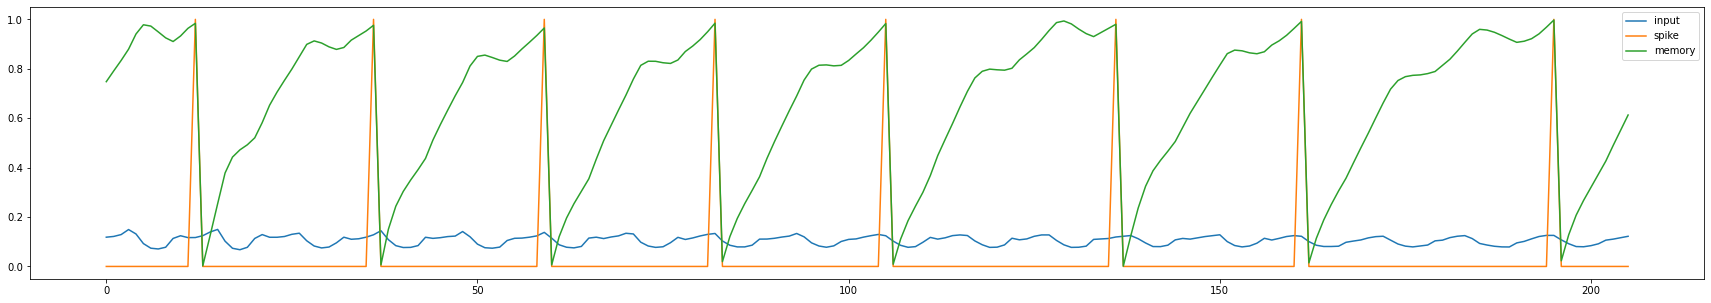

In [35]:
n = 0
plt.figure(figsize=(30,5))
plt.plot(X_train[n,0,:]/5, label='input')
plt.plot(spikes[n,:].detach().numpy(), label='spike')
plt.plot(memories[n,:].detach().numpy(), label='memory')
plt.legend()

In [36]:
sl = psnn.SpikingLayer(N_channel, beta, threshold, random_state=True, spike_only=False)
sl

SpikingLayer(
  (SNNList): ModuleList(
    (0): SpikingNeuron()
    (1): SpikingNeuron()
    (2): SpikingNeuron()
  )
)

In [37]:
spikes, memories = sl(X_train/5.)

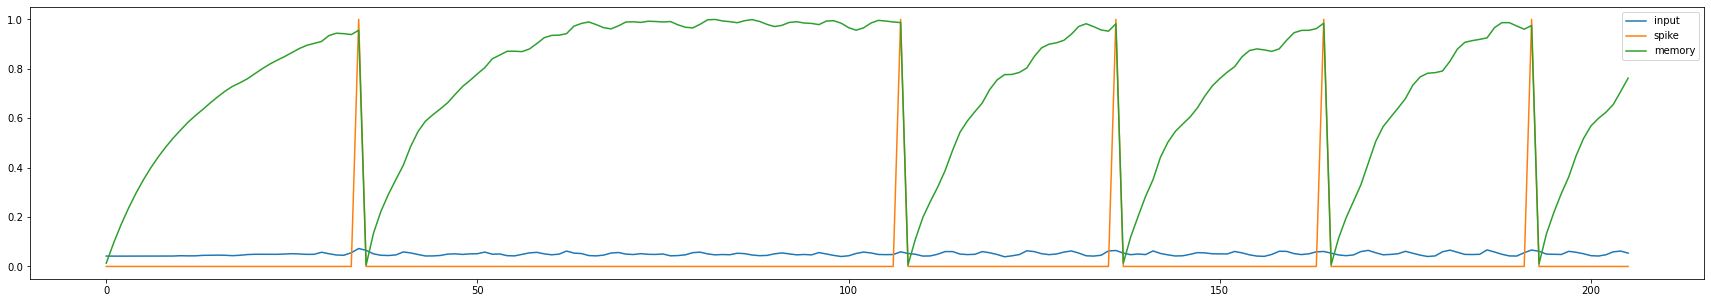

In [38]:
n = 0
c = 2
plt.figure(figsize=(30,5))
plt.plot(X_train[n,c,:]/10, label='input')
plt.plot(spikes[n,c,:].detach().numpy(), label='spike')
plt.plot(memories[n,c,:].detach().numpy(), label='memory')
plt.legend()

In [39]:
tmac = psnn.TemporalWeightedSum(N_channel, N_class)
tmac

TemporalWeightedSum()

In [40]:
mactmac = tmac(spikes)
mactmac.shape

torch.Size([165, 4, 206])

In [41]:
torch.manual_seed(seed)
topology = [N_channel, 3, N_class]
snn = psnn.SpikingNeuralNetwork(topology, beta, threshold)
snn.ResetOutput(False, 1)
input = snn.model[0](X_train)
spikes,memories = snn.model[1](input)

Reset output of layer 1.


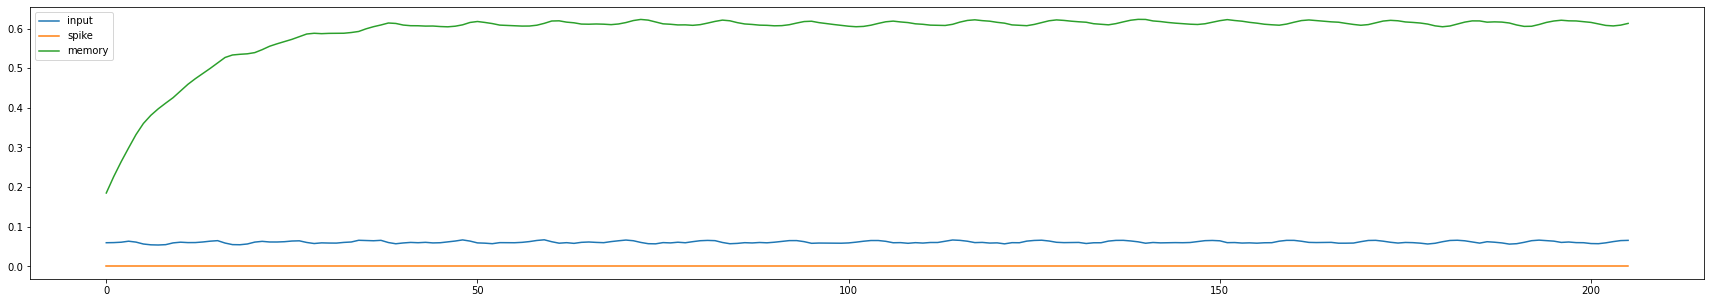

In [45]:
n = 0
c = 0
plt.figure(figsize=(30,5))
plt.plot(input[n,c,:].detach().numpy(), label='input')
plt.plot(spikes[n,c,:].detach().numpy(), label='spike')
plt.plot(memories[n,c,:].detach().numpy(), label='memory')
plt.legend()